![](img/logo.png)

# Principal component analysis

## Yoav Ram

In this session we will understand what is principal component analysis, or PCA.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np
import seaborn as sns
import pandas as pd
from ipywidgets import interact
import scipy.stats

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

sns.set_context('talk')

def pca_labels():
    plt.xlabel('PC1')
    plt.ylabel('PC2')

# Example: synthetic data

We start with a simple example using some mock data `X`.

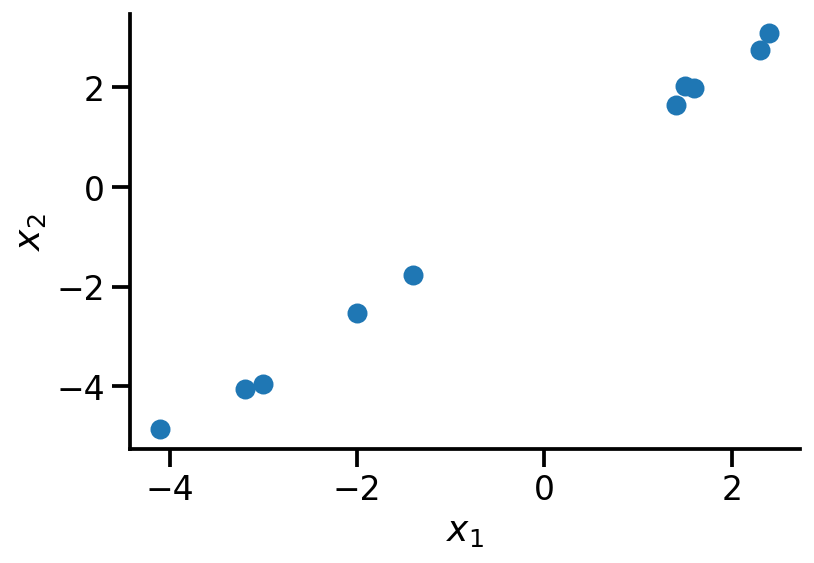

In [3]:
X = np.array([
    [1.4, 1.65],
    [1.6, 1.975],
    [-1.4, -1.775],
    [-2, -2.525],
    [-3, -3.95],
    [2.4, 3.075],
    [1.5, 2.025],
    [2.3, 2.75],
    [-3.2, -4.05],
    [-4.1, -4.85]
])
n = X.shape[0]

plt.plot(X[:,0], X[:,1], 'o')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
sns.despine()

The goal is to conver these two highly correlated variables, $x_1$ and $x_2$, into one variable that has most of the information in $x_1$ and $x_2$.

Our objective is to transform the data, using only rotation and reflections (or in general, orthogonal transformations), so that the transformed x-axes, called the first principle component, will account for as much of the variability in the data as possible.

Note: PCA is normally applied to multidimensional data, but the idea is the same: each subsequent principal component should account for as much unexplained variability as possible.

We use Scikit-learn's `PCA` model. The `fit_transform` will both find the set of transformations and apply them to the data, producing the transofrmed data `X_`.

The plot shows the original data in blue and the transformed data in orange, with arrows pointing from original to transformed.

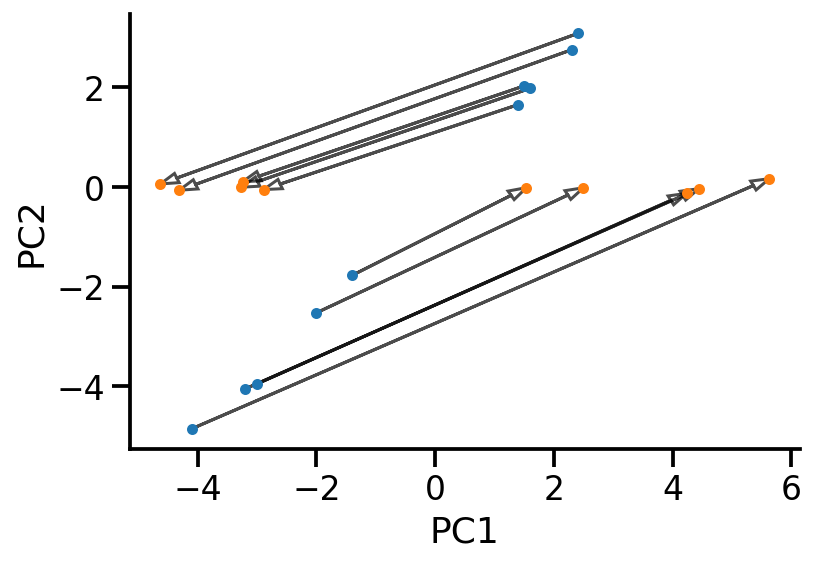

In [3]:
X_ = PCA(n_components=2).fit_transform(X)

plt.plot(X[:,0], X[:,1], '.')
plt.plot(X_[:,0], X_[:,1], '.')

for j in range(X.shape[0]):
    x1, x2, x1_, x2_ = X[j,0], X[j,1], X_[j,0], X_[j,1]
    dx1, dx2 = x1_ - x1, x2_ - x2
    plt.arrow(x1, x2, dx1, dx2, head_width=0.2, length_includes_head=True, fc='none', alpha=0.7)
    
pca_labels()
sns.despine()

# Technical details

Our data matrix $X$ of shape $n$-by-$m$, is composed of a column of length $n$ for each feature $x_1, x_2, \ldots, x_m$.

We assume that the features are already normalized, that is, that $E[x_k] = 0$ for all $k$; otherwise, we redefine $x_k \leftarrow x_k - E[x_k]$. 

We are looking for a projection matrix $A$ in which each colum is a vector defining the direction of one of the new axes, and these columns must be orthogonal (and even orthonormal, $A^T A = I$). 

Then $A$ is an $m$-by-$m$ matrix, with columns $a_1, \ldots, a_m$.

The data after the project is $\tilde X$:
$$
\tilde X = X \cdot A^T
$$

The first projected column $\tilde  x_1$, or feature, is called the first **principal component** and denoted PC1. It is defined by
$$
\tilde x_1 = X \cdot a_1
$$
and we want to find $a_1$ that maximized $Var[\tilde x_1]$ subject to the constraint $a_1^T a_1=1$.

By definition of variance,

$$
Var[\tilde x_1] = E[\tilde x_1 ^2] - E[\tilde x_1]^2
$$

To proceed, note that for $E[\tilde x_1] = E[X \cdot a_1] = 0$ becuase we assumed $E[x_k]=0$ for all $k$, so (all expectations are over the data samples):

$$
Var[\tilde x_1] = 
E[\tilde x_1 ^2] = \\ 
E[(X \cdot a_1)^2] = E[X \cdot a_1 \cdot X \cdot a_1] = \\
E[(X \cdot a_1)^2] = E[X \cdot a_1 \cdot X \cdot a_1] = a_1 E[X^T X] a_1 ^T = \\
a_1 S a_1 ^T
$$
where $S=E[X^T X]$ is the covariance matrix of $X$.

Then, we are looking for $a_1$ that maximizes $a_1 S a_1 ^T$ with the constraint $a_1 ^T a_1 = 1$.

This is an optimization problem that can be solved using the method of Lagrange multipliers.
That is, we are looking for $a_1, \lambda$ that maximize the expression
$$
L(a_1, \lambda) = a_1 S a_1 ^T - \lambda (a_1 a_1^T - 1)
$$
To find the max, we take the derivative with respect to $a_1$ and set it to zero:
$$
\frac{\partial L}{a_1} = 2 a_1 S - 2 \lambda a_1 = 0 \Rightarrow \\
a_1 S = \lambda a_1
$$
So, $\lambda$ is an eigenvalue of $S$ and $a_1$ is its corresponding eigenvector.

Moreover, we get:
$$
Var[\tilde x_1] = a_1 S a_1^T = \lambda a_1 a_1 ^T = \lambda
$$
So the eigenvalue of $S$ equals the variance of $\tilde x_1$.

This process holds for all $\tilde x_k$.

Therefore, the eigenvalues of $S$ are the variances of the projected data, or the new features, and the eigenvectors of $S$ are new projection axes.

## Exercise: PCA implementation

To make sure you understand correctly, **write the Python code corresponding to the above mathematical derivation**.

In [ ]:
# your code here

S =
 [[ 6.64777778  8.27138889]
 [ 8.27138889 10.310625  ]]

λ = 16.950918251164786 0.007484526612989484 16.958402777777778

VAR PC1:,  0.9995586538006516

A =
 [[-0.62602679 -0.77980155]
 [-0.77980155  0.62602679]]

X_ =
 [[-2.8873595  -0.05441848]
 [-3.26600036 -0.00692008]
 [ 1.53633582 -0.01511587]
 [ 2.49680306 -0.01675502]
 [ 4.23404706 -0.12904164]
 [-4.6246035   0.05786814]
 [-3.24238776  0.10236141]
 [-4.30856532 -0.06761041]
 [ 4.43723257 -0.03568401]
 [ 5.62449792  0.16531596]]


The is the same plot as above, but uses `X_` that you reproduced in the above cell.

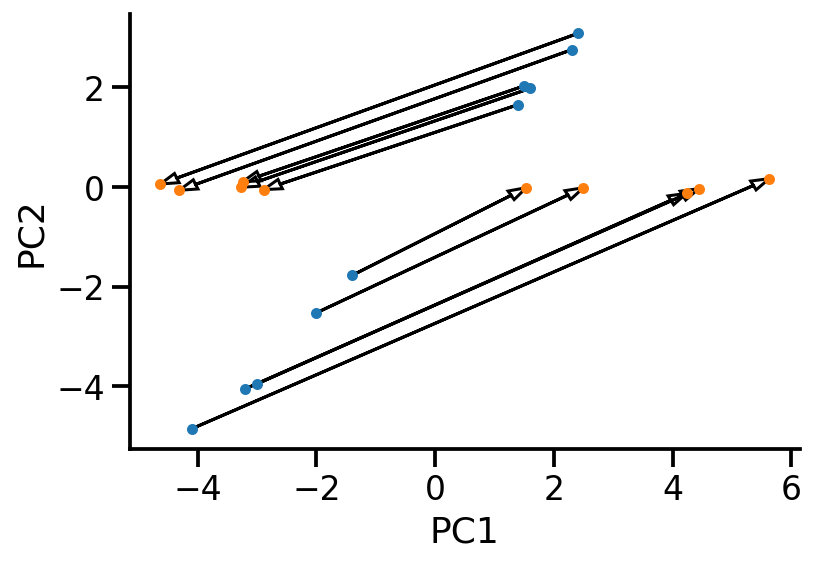

In [79]:
plt.plot(X[:,0], X[:,1], '.')
plt.plot(X_[:,0], X_[:,1], '.')

for j in range(X.shape[0]):
    x1, x2, x1_, x2_ = X[j,0], X[j,1], X_[j,0], X_[j,1]
    dx1, dx2 = x1_ - x1, x2_ - x2
    plt.arrow(x1, x2, dx1, dx2, head_width=0.2, length_includes_head=True, fc='none')
pca_labels()
sns.despine()

# Example: Iris dataset

We now proceed to an intermediate number of dimensions: the Iris dataset has four features of three types of flowers.

In [6]:
df = pd.read_csv('../data/iris.csv')
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets = df['target'].unique()
df['target'] = [(targets==tar).argmax() for tar in df['target']] # convert strings to integers
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


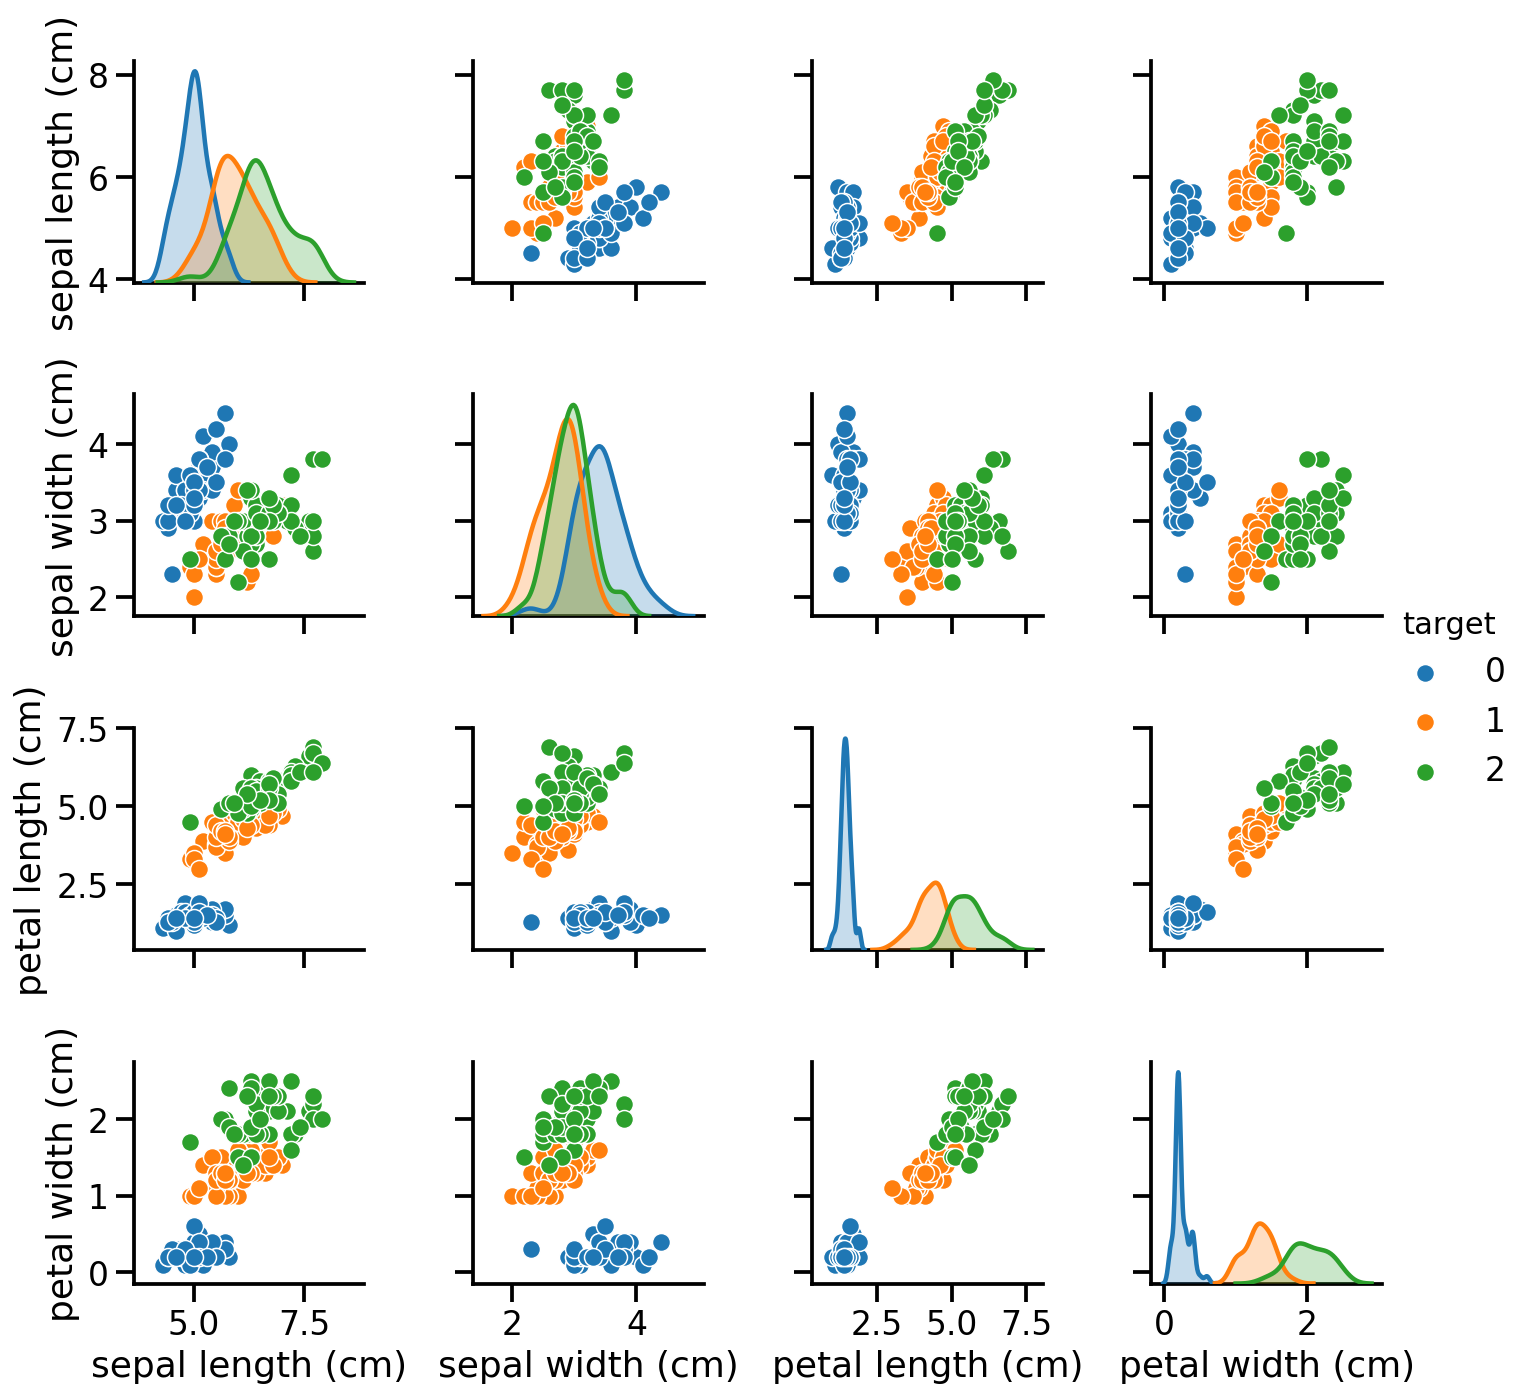

In [7]:
sns.pairplot(df, vars=features, hue='target');

Since the Iris dataset is labeled (targets are included), we can use it to demonstrate the potential of PCA for classification.

Start by plotting the original dataset, but only with the petal length and petal width, which we already determined are the best two variables to use for k-nearest neighbors.

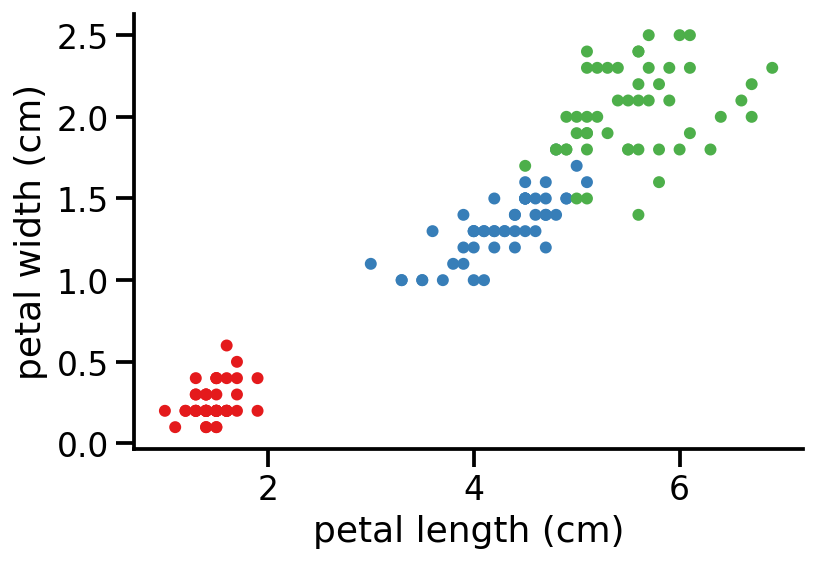

In [22]:
palette = np.array(sns.color_palette('Set1', 3))
colors = palette[df['target']]

df.plot.scatter('petal length (cm)', 'petal width (cm)', s=20, c=colors);
sns.despine()

Now we use PCA to transform the entire Iris dataset to a 2D space.

Note: the use of `scale` on the data to make sure that all variables have the same scale.

In [18]:
X = scale(df[features].values) # (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)
X_ = PCA(n_components=2).fit_transform(X)

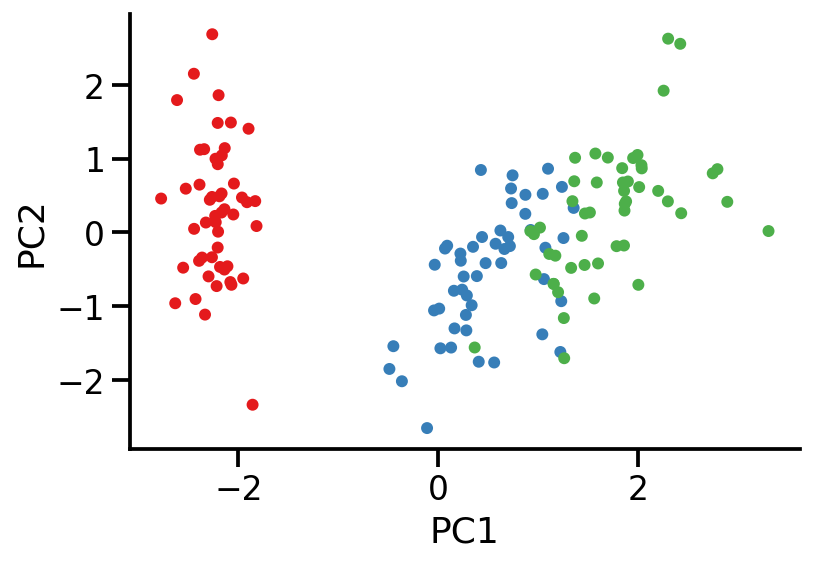

In [23]:
plt.scatter(X_[:,0], X_[:,1], s=20, c=colors)
pca_labels()
sns.despine()

# Exercise: Digits dataset

Now we load the digits dataset. This is a dataset of handwritten digits saved as 8-by-8 images.
The images are made of 64 pixel values between 0 and 16 -- this is a high-dimensional problem.

In [26]:
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()
X = digits.data
X = (X-8)/8 # move data from 0-16 to -1-1
n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

@interact(idx=(0, X.shape[0], 1))
def plot_digit(idx=0):
    plt.figure(figsize=(1, 1))
    plt.imshow(X[idx].reshape((8, 8)), norm=BoundaryNorm(np.unique(X), 255), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    print("Digit:", labels[idx])

interactive(children=(IntSlider(value=0, description='idx', max=1797), Output()), _dom_classes=('widget-intera…

**Use PCA to project the dataset to a 2D space**, then use the second cell to plot the digits.**

The plot uses a different color for each digit (i.e. label) and also uses text to denote the digits.

The plot will show us what digits are "close" to each other, which should reflect some measure of similarity.

Does it make sense? Did you expect 0 to be close to 9 and 6? 4 close to 6? 7 and 1?

In [32]:
pca = PCA()
X_ = pca.fit_transform(X)

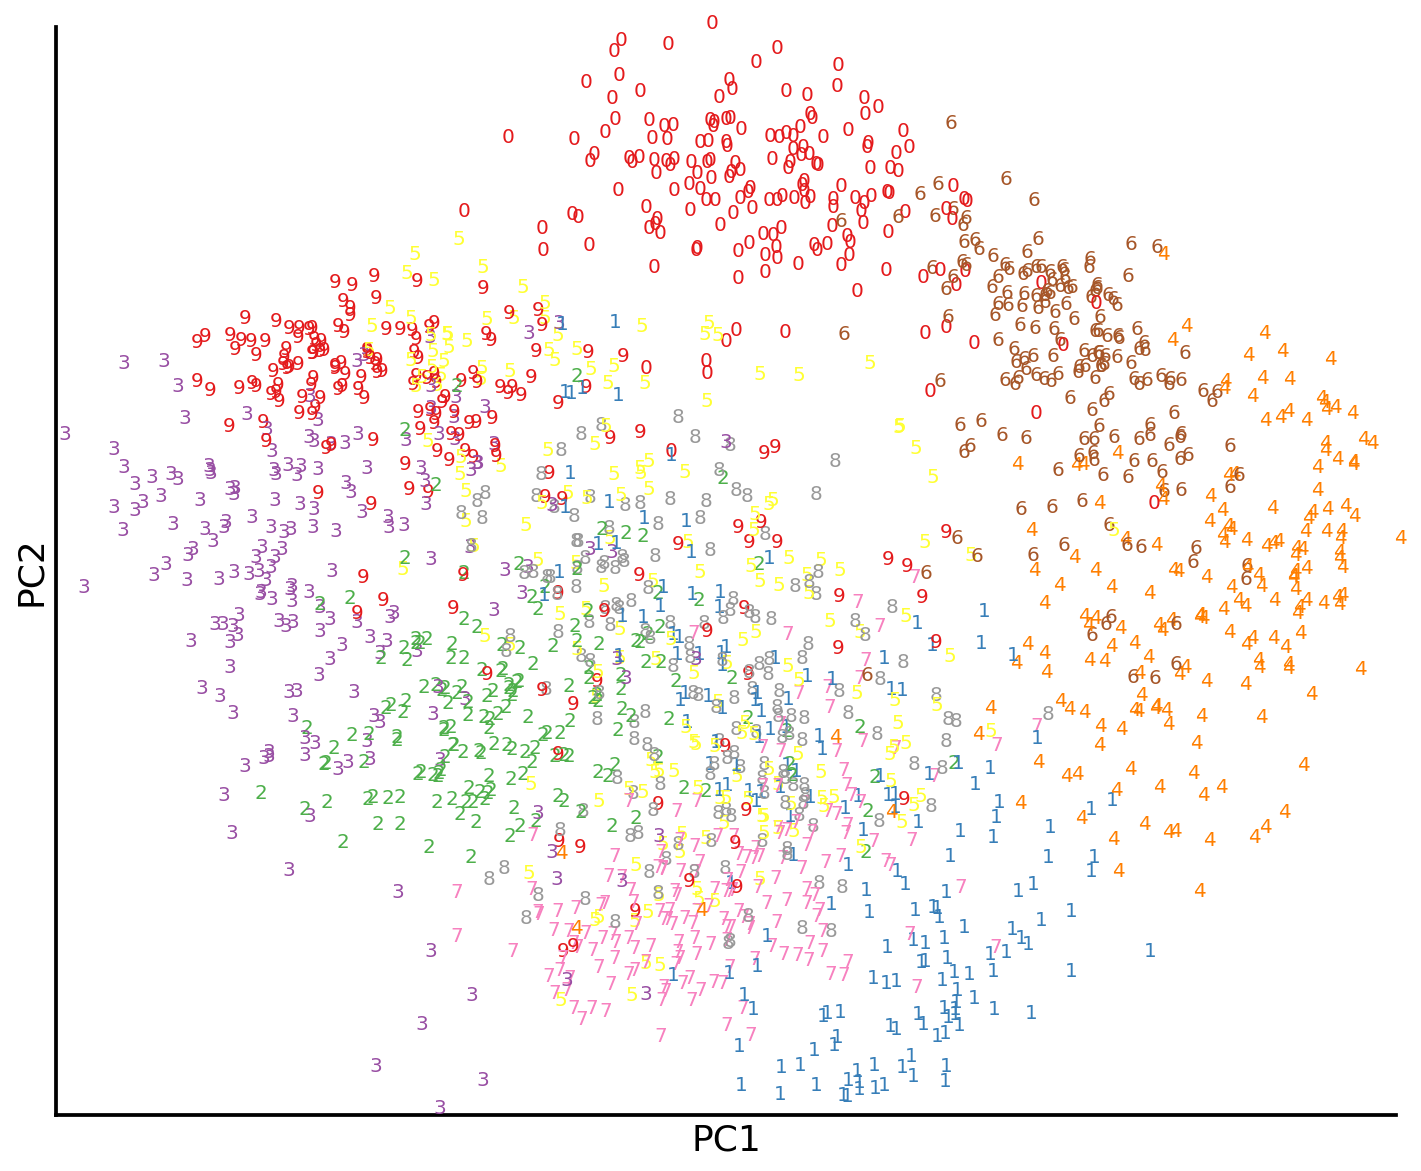

In [33]:
colors = sns.color_palette('Set1', 10)

PC1 = X_[:, 0]
PC2 = X_[:, 1]

fig, ax = plt.subplots(figsize=(12, 10))
for pc1, pc2, s in zip(PC1, PC2, labels):
    c = colors[s]
    ax.text(pc1, pc2, str(s), fontdict=dict(fontsize=10, color=c))
ax.set_xlim(PC1.min()-0.01, PC1.max()+0.01)
ax.set_ylim(PC2.min()-0.01, PC2.max()+0.01)
ax.set_xticks([])
ax.set_yticks([])
pca_labels()
sns.despine()

### Variance explained

In high-dimensional cases it is interesting to see the % of variance explained by each principal component.
In this case we can see that the first 3-4 components explain 40%-50% of the variance.

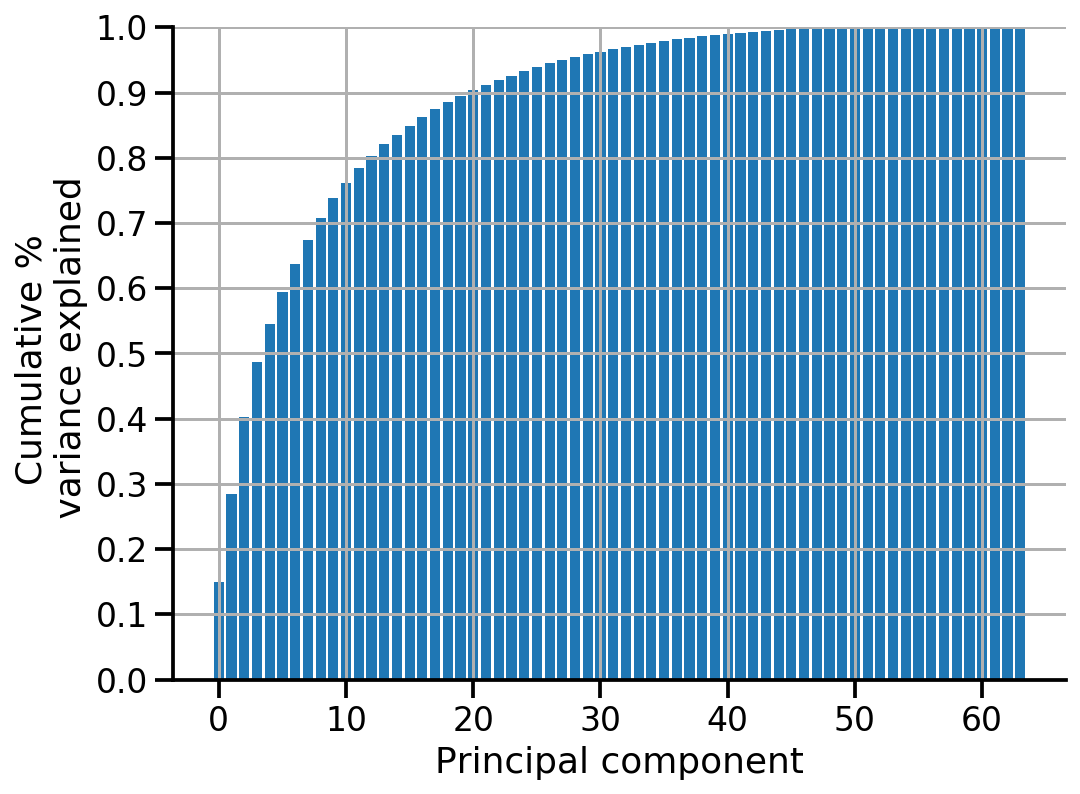

In [34]:
var = pca.explained_variance_ratio_
cumvar = np.cumsum(var)

plt.figure(figsize=(8, 6))
plt.grid(True)
plt.bar(range(n_features), cumvar)
plt.xlabel('Principal component')
plt.ylabel('Cumulative % \n variance explained')
plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 11))
sns.despine()

# Exercise: t-SNE

Another method for dimensionality reduction that is becoming increasingly popular is 
_t-Distributed Stochastic Neighbor Embedding_, or t-SNE.
t-SNE is probablistic method, rather than an algebraic method.

It is very easy to use t-SNE in Scikit-learn: **swap `PCA` for `TSNE`**, fit the model to the data, and plot the results.

In [14]:
# your code here

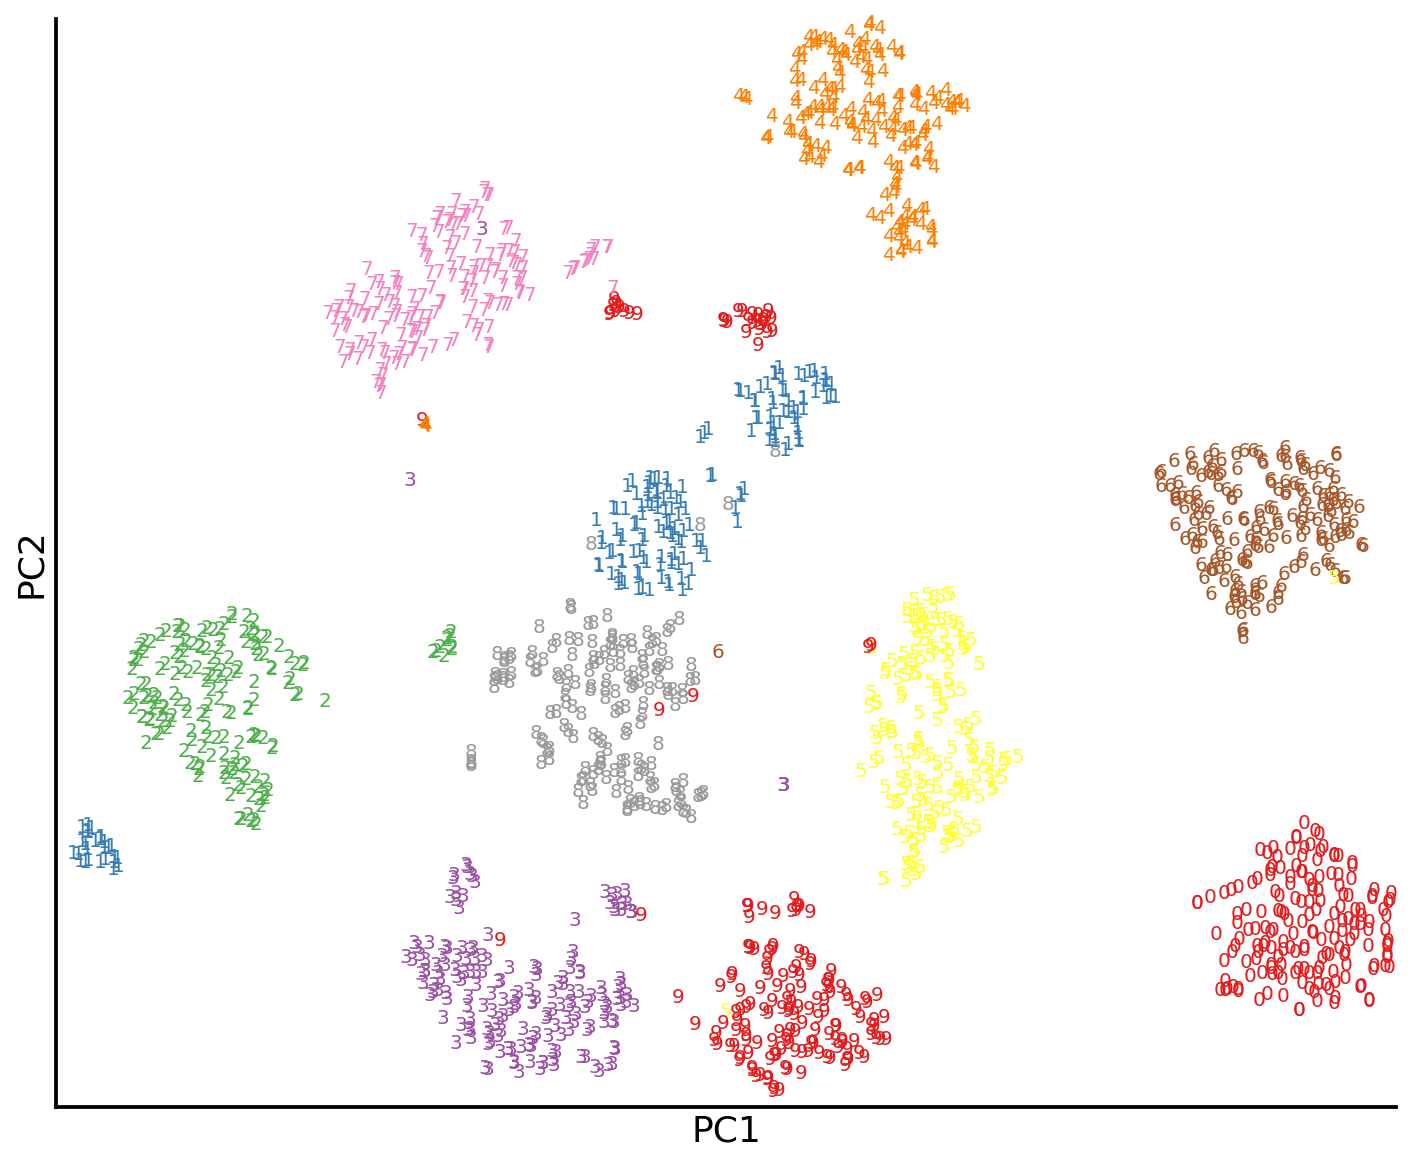

As you can see, t-SNE produces a much better separation between the different clusters of points, even clustering those rouge 9s between the 7s and 1s together.

# Refernces

- Jon Shlens' [PCA tutorial](https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf)
- [t-SNE paper](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf)
- [PCA tutorial published in Nature](https://www.nature.com/articles/nmeth.4346.pdf)

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.6.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)